# Лабораторна робота №8
## Структура даних граф. Алгоритми на графах
## Візуалізація графа

Задаємо орієнтований зважений граф, що представляє собою мережу міст та доріг між ними. Вершини — це міста, ребра — дороги з вагою, яка відповідає відстані між містами.

Для наочності використовуємо рознесене розташування вершин, щоб уникнути скупчення точок.

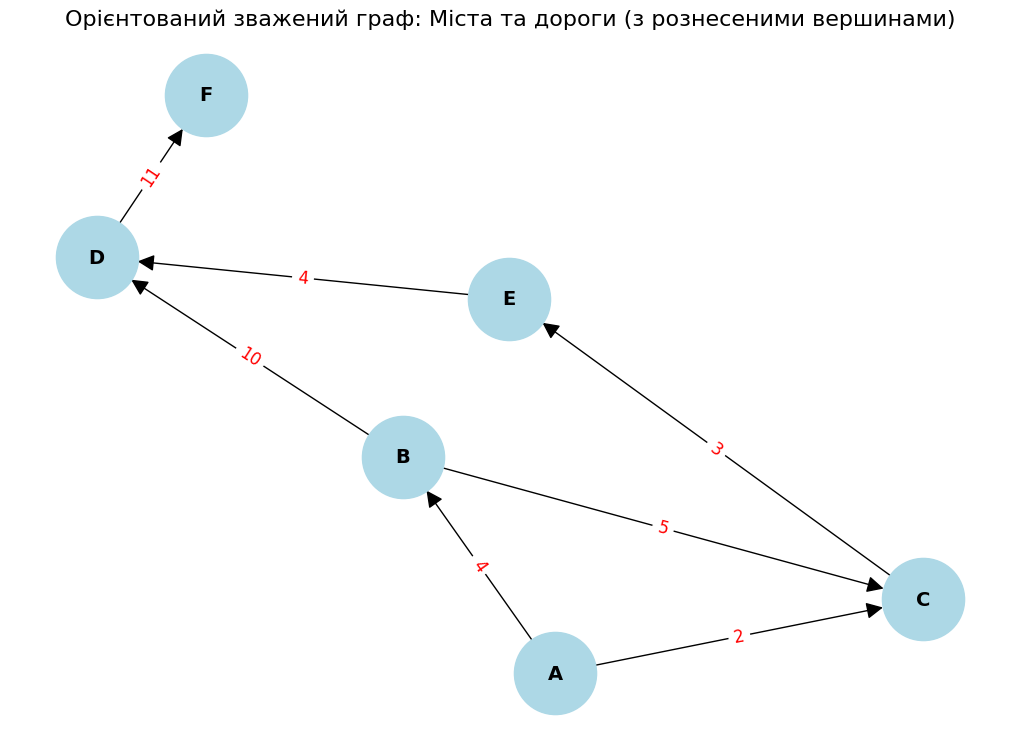

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(G, title):
    plt.figure(figsize=(10,7))
    pos = nx.spring_layout(G, seed=42, k=1.2)  # k=1.2 - збільшує відстань між вершинами
    nx.draw(G, pos, with_labels=True, node_size=3500, node_color="lightblue",
            font_size=14, font_weight="bold", arrowsize=25)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=12)
    plt.title(title, fontsize=16)
    plt.show()

# Створюємо орієнтований граф з вагами
G = nx.DiGraph()
cities = ['A', 'B', 'C', 'D', 'E', 'F']
G.add_nodes_from(cities)
edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 5),
    ('B', 'D', 10),
    ('C', 'E', 3),
    ('E', 'D', 4),
    ('D', 'F', 11)
]
G.add_weighted_edges_from(edges)

draw_graph(G, "Орієнтований зважений граф: Міста та дороги (з рознесеними вершинами)")

## Пошук у ширину (BFS)

Алгоритм BFS обходитиме граф по рівнях, починаючи з вершини 'A', і відвідає всі досяжні вершини у порядку їхнього віддалення від стартової.

Порядок обходу BFS: ['A', 'B', 'C', 'D', 'E', 'F']


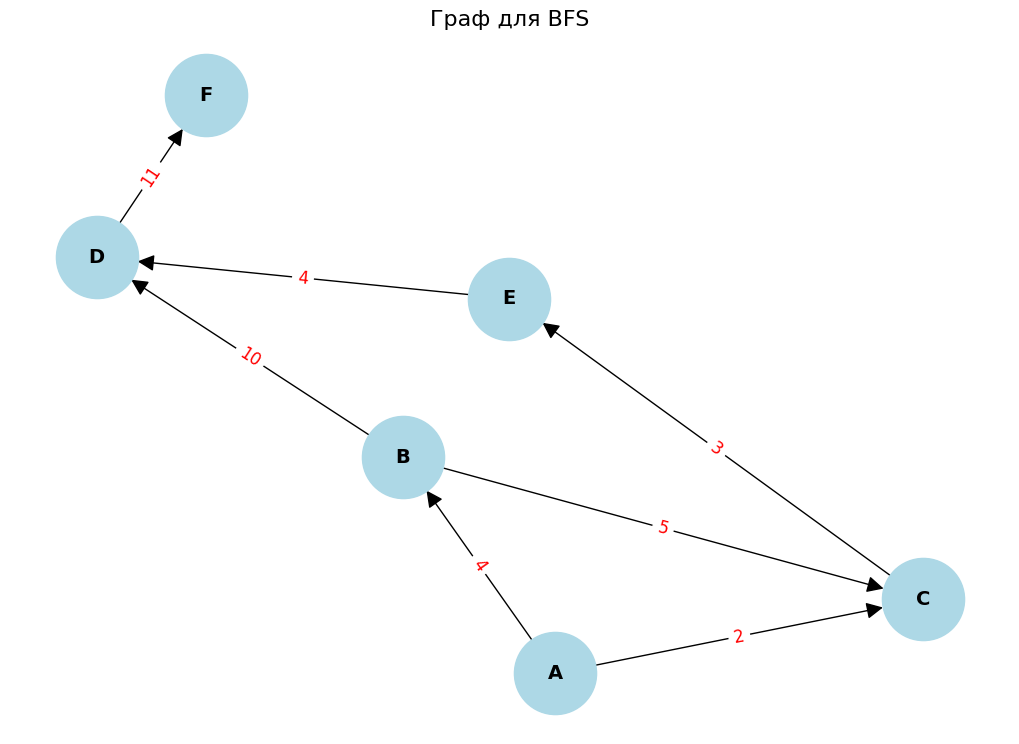

Порядок обходу BFS: ['A', 'B', 'C', 'D', 'E', 'F']


In [15]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    order = []
    
    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            order.append(vertex)
            queue.extend([n for n in graph.neighbors(vertex) if n not in visited])
    return order

bfs_order = bfs(G, 'A')
print("Порядок обходу BFS:", bfs_order)

draw_graph(G, "Граф для BFS")

bfs_order = bfs(G, 'A')
print("Порядок обходу BFS:", bfs_order)

## Візуалізація кроків BFS (Пошук у ширину)

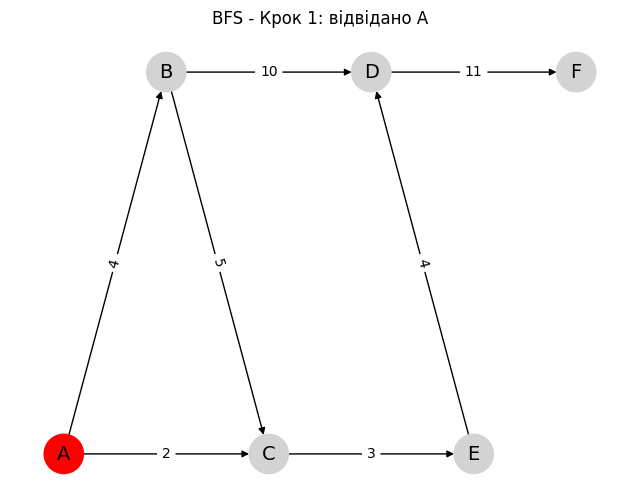

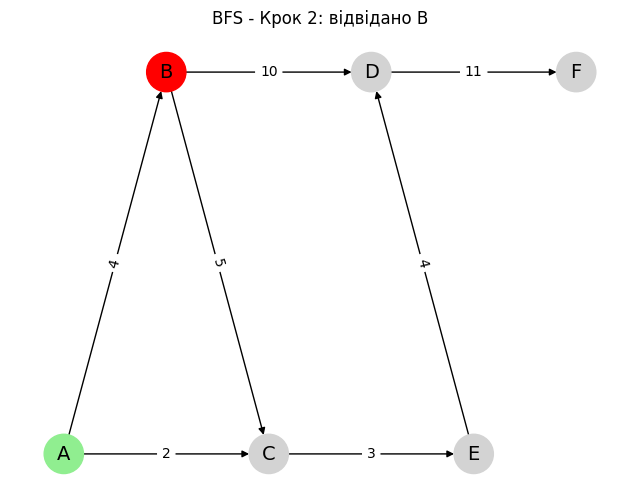

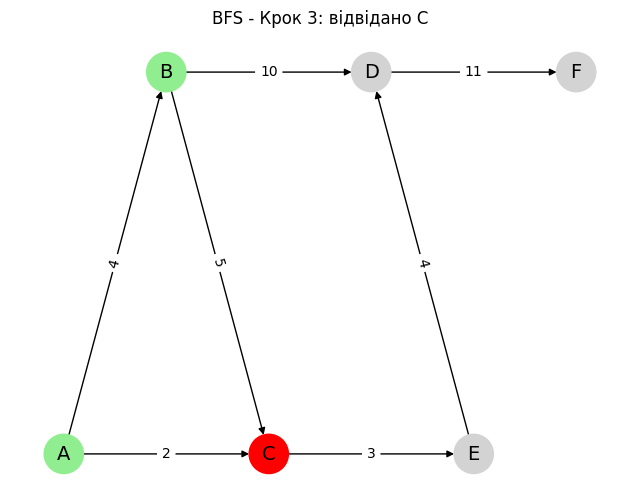

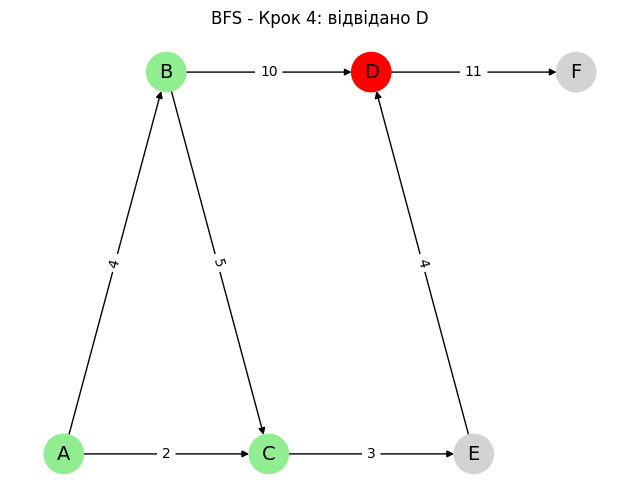

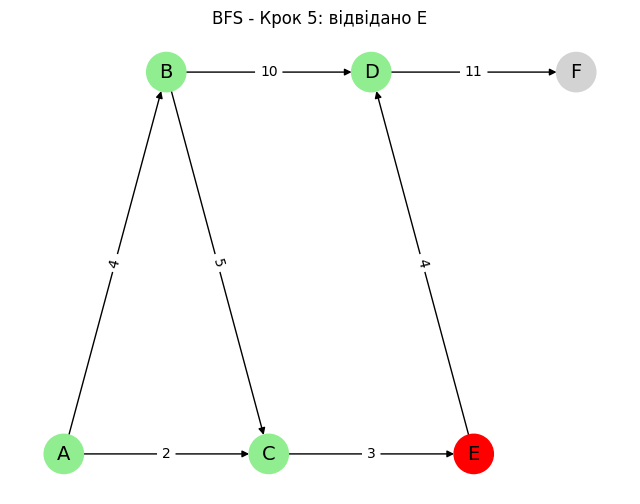

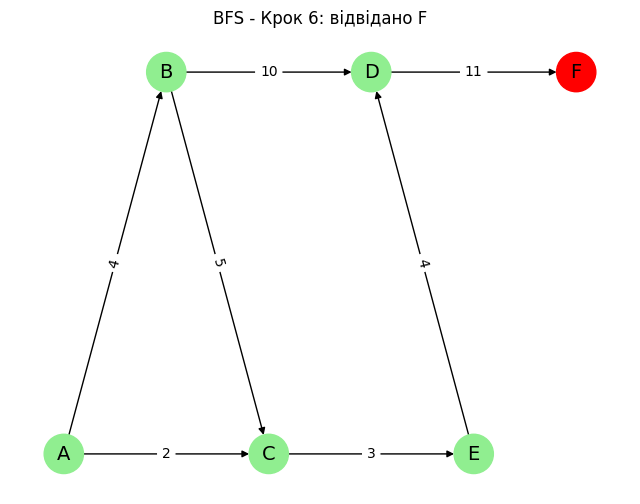

Порядок обходу BFS: ['A', 'B', 'C', 'D', 'E', 'F']


In [23]:
def bfs_visualized(graph, start_node):
    positions = {
    'A': (0, 0),
    'B': (2, 2),
    'C': (4, 0),
    'D': (6, 2),
    'E': (8, 0),
    'F': (10, 2)
}
    visited = set()
    queue = [start_node]
    order = []
    step = 1

    while queue:
        current = queue.pop(0)
        if current not in visited:
            visited.add(current)
            order.append(current)

            # Візуалізація кроку
            color_map = []
            for node in graph:
                if node == current:
                    color_map.append('red')
                elif node in visited:
                    color_map.append('lightgreen')
                else:
                    color_map.append('lightgray')

            plt.figure(figsize=(8,6))
            nx.draw_networkx(graph, pos=positions, with_labels=True, node_color=color_map, node_size=800, font_size=14)
            labels = nx.get_edge_attributes(graph, 'weight')
            nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=labels)
            plt.title(f"BFS - Крок {step}: відвідано {current}")
            plt.axis('off')
            plt.show()
            step += 1

            queue.extend(sorted(set(graph[current]) - visited))

    print("Порядок обходу BFS:", order)
    return order

# Запуск
bfs_order = bfs_visualized(G, 'A')

## Пошук у глибину (DFS)

Алгоритм DFS рекурсивно проходить у глибину по кожній гілці графа, поки не досягне кінця, потім повертається назад і досліджує інші гілки.

Порядок обходу DFS: ['A', 'B', 'C', 'E', 'D', 'F']


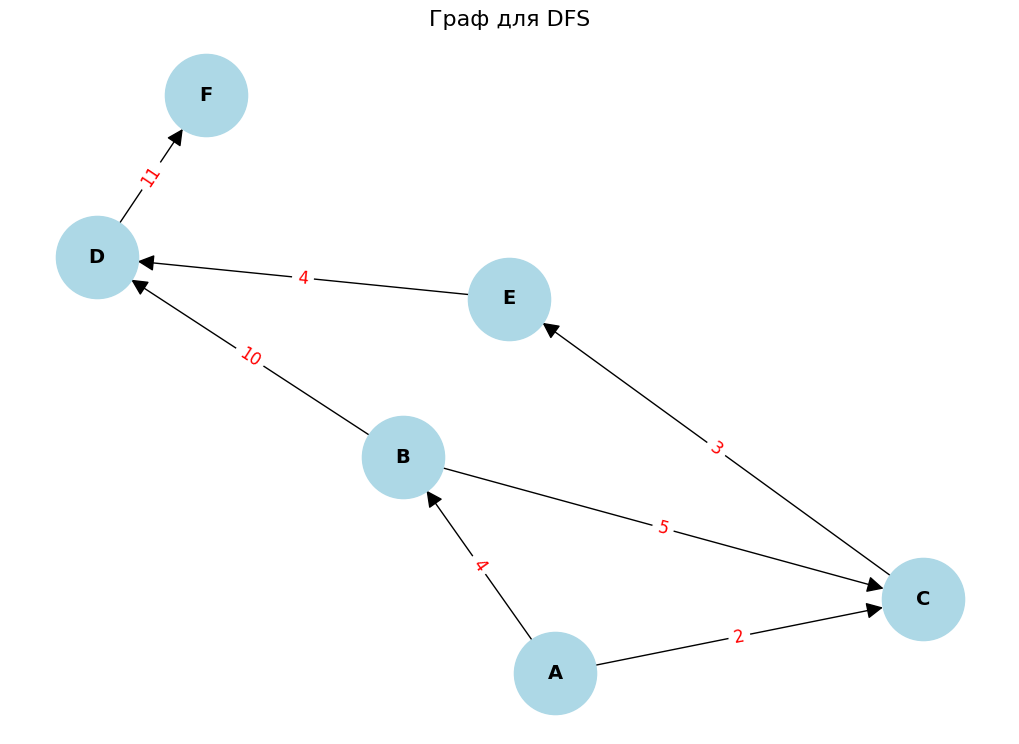

Порядок обходу DFS: ['A', 'B', 'C', 'E', 'D', 'F']


In [16]:
def dfs(graph, start, visited=None, order=None):
    if visited is None:
        visited = set()
    if order is None:
        order = []
        
    visited.add(start)
    order.append(start)
    
    for neighbor in graph.neighbors(start):
        if neighbor not in visited:
            dfs(graph, neighbor, visited, order)
    return order

dfs_order = dfs(G, 'A')
print("Порядок обходу DFS:", dfs_order)

draw_graph(G, "Граф для DFS")

dfs_order = dfs(G, 'A')
print("Порядок обходу DFS:", dfs_order)

## Візуалізація кроків DFS (Пошук у глибину)

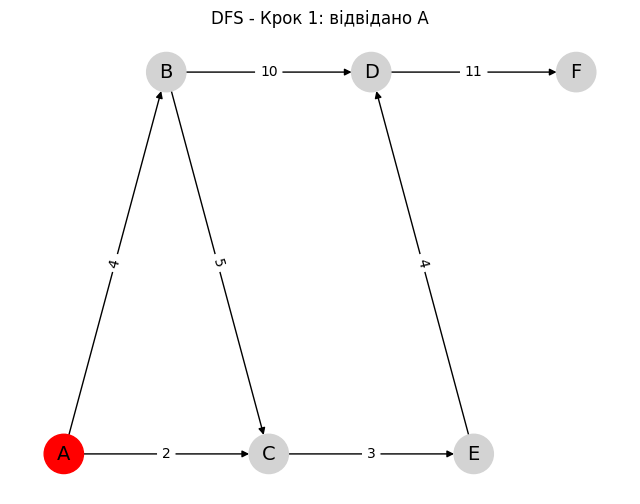

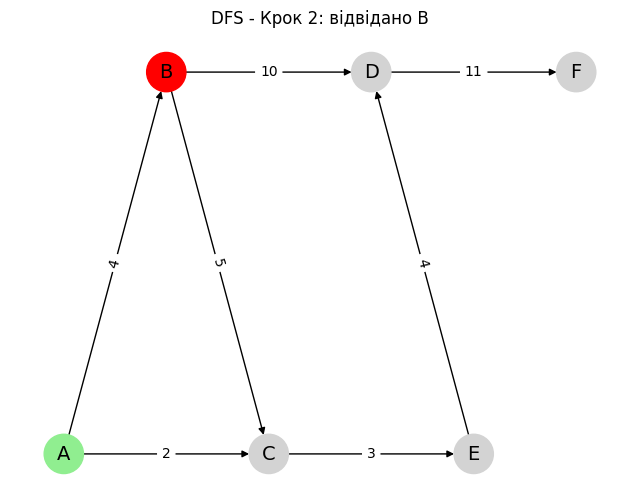

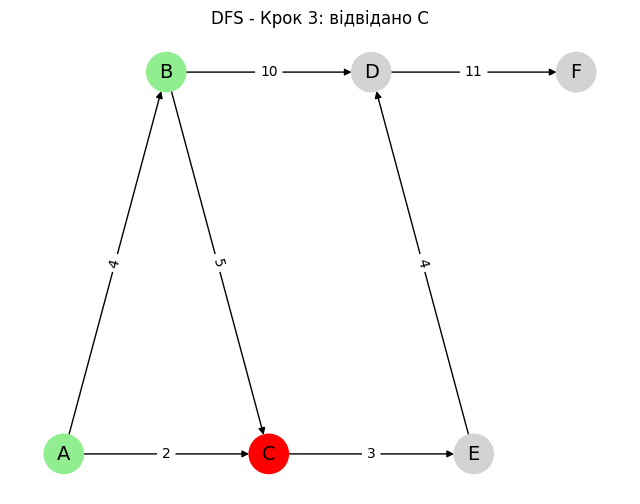

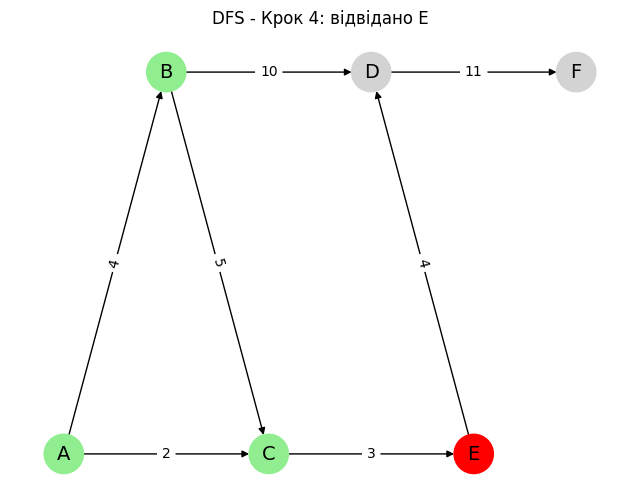

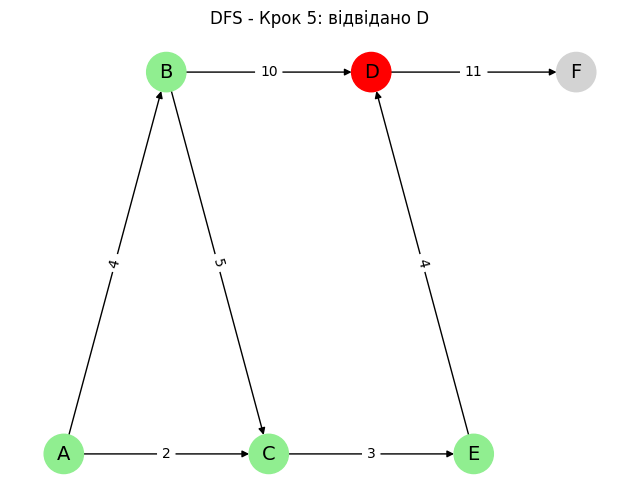

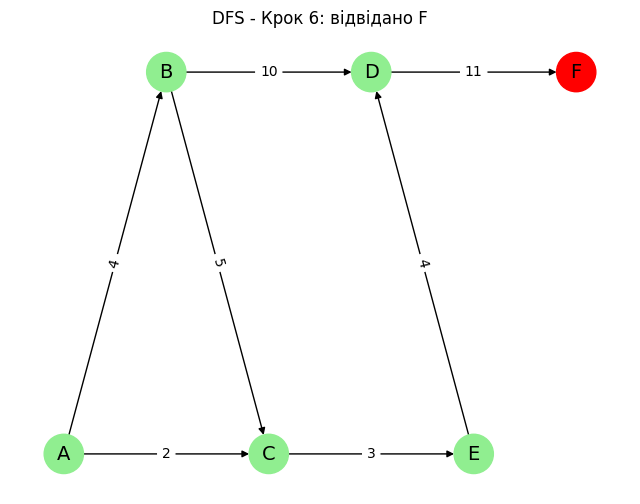

Порядок обходу DFS: ['A', 'B', 'C', 'E', 'D', 'F']


In [25]:
def dfs_visualized(graph, start_node):
    positions = {
    'A': (0, 0),
    'B': (2, 2),
    'C': (4, 0),
    'D': (6, 2),
    'E': (8, 0),
    'F': (10, 2)
}
    visited = set()
    stack = [start_node]
    order = []
    step = 1

    while stack:
        current = stack.pop()
        if current not in visited:
            visited.add(current)
            order.append(current)

            # Візуалізація кроку
            color_map = []
            for node in graph:
                if node == current:
                    color_map.append('red')
                elif node in visited:
                    color_map.append('lightgreen')
                else:
                    color_map.append('lightgray')

            plt.figure(figsize=(8,6))
            nx.draw_networkx(graph, pos=positions, with_labels=True, node_color=color_map, node_size=800, font_size=14)
            labels = nx.get_edge_attributes(graph, 'weight')
            nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=labels)
            plt.title(f"DFS - Крок {step}: відвідано {current}")
            plt.axis('off')
            plt.show()
            step += 1

            stack.extend(reversed(sorted(set(graph[current]) - visited)))

    print("Порядок обходу DFS:", order)
    return order

# Запуск
dfs_order = dfs_visualized(G, 'A')

## Алгоритм Беллмана-Форда

Алгоритм дозволяє знайти найкоротші шляхи від однієї вершини до всіх інших у графі з можливими від’ємними вагами ребер (але без негативних циклів).

Відстані за алгоритмом Беллмана-Форда від вершини A:
  A: 0
  B: 4
  C: 2
  D: 9
  E: 5
  F: 20


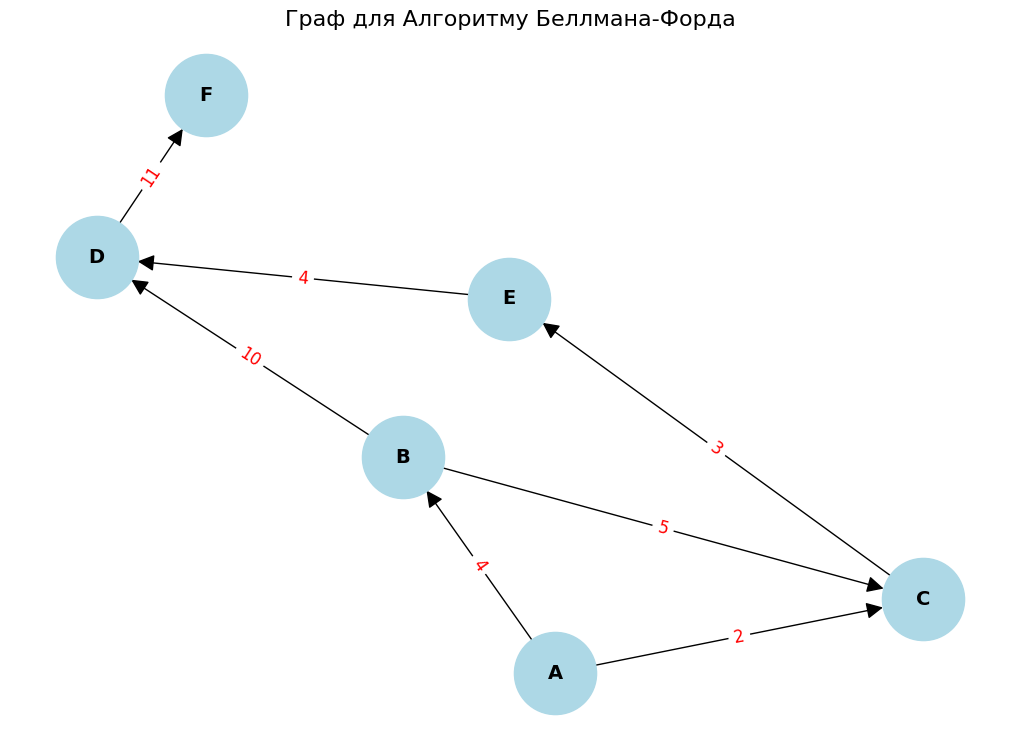

Відстані за алгоритмом Беллмана-Форда від вершини A:
  A: 0
  B: 4
  C: 2
  D: 9
  E: 5
  F: 20


In [20]:
import math

def bellman_ford(graph, start):
    distance = {node: math.inf for node in graph.nodes}
    distance[start] = 0
    
    for _ in range(len(graph.nodes) - 1):
        for u, v, w in graph.edges(data='weight'):
            if distance[u] + w < distance[v]:
                distance[v] = distance[u] + w
                
    # Перевірка на негативні цикли
    for u, v, w in graph.edges(data='weight'):
        if distance[u] + w < distance[v]:
            raise ValueError("Граф містить негативний цикл")
            
    return distance

bf_distances = bellman_ford(G, 'A')
print("Відстані за алгоритмом Беллмана-Форда від вершини A:")
for city, dist in bf_distances.items():
    print(f"  {city}: {dist}")

draw_graph(G, "Граф для Алгоритму Беллмана-Форда")

bf_distances = bellman_ford(G, 'A')
print("Відстані за алгоритмом Беллмана-Форда від вершини A:")
for city, dist in bf_distances.items():
    print(f"  {city}: {dist}")

## Візуалізація роботи алгоритму Беллмана-Форда

Ітерація 1


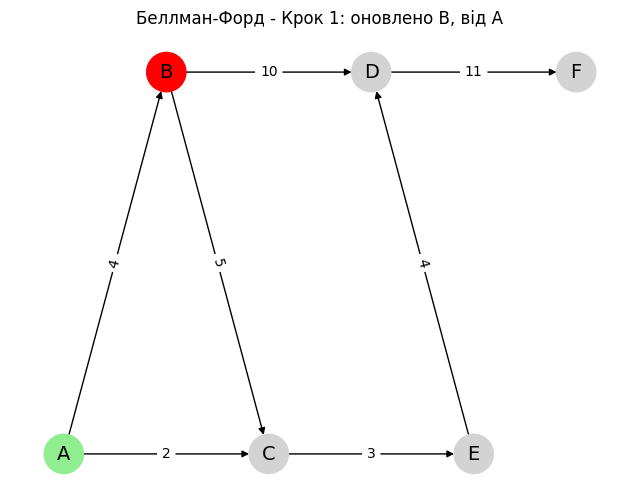

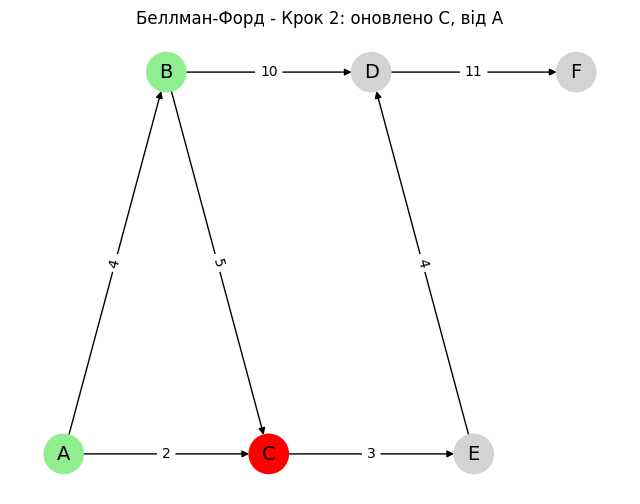

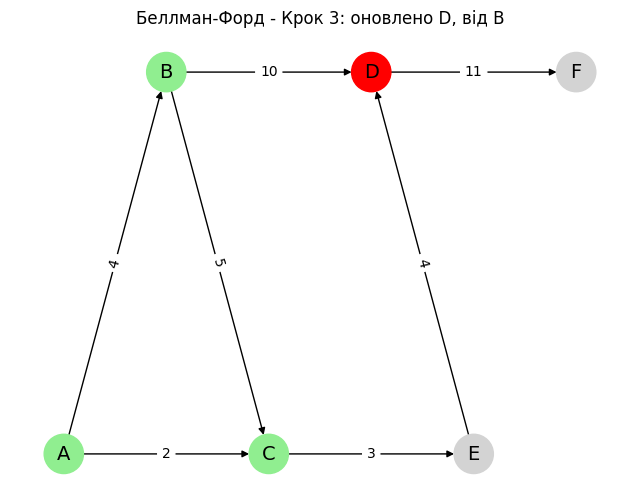

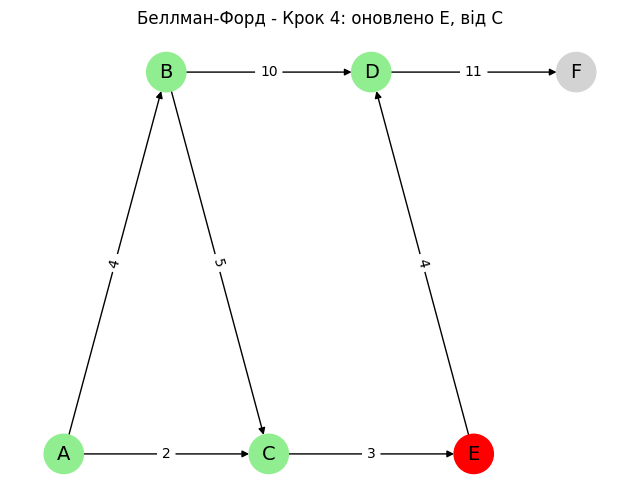

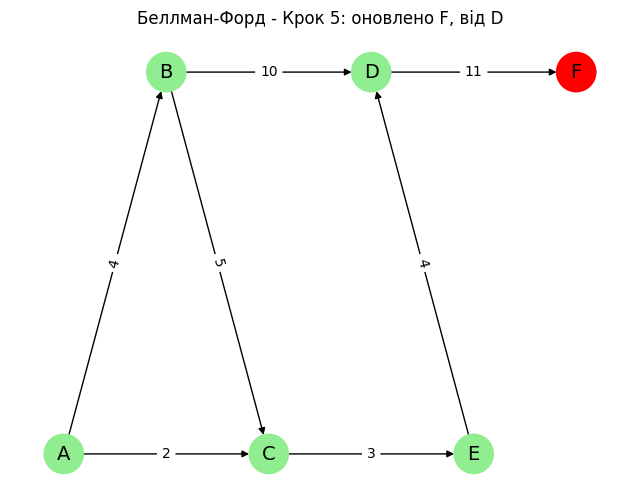

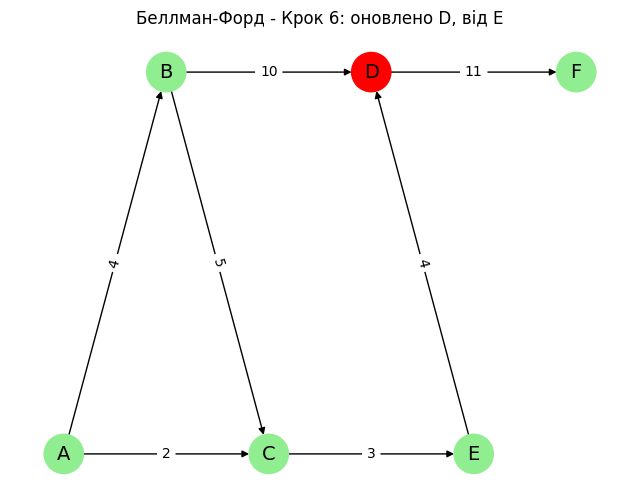

Ітерація 2


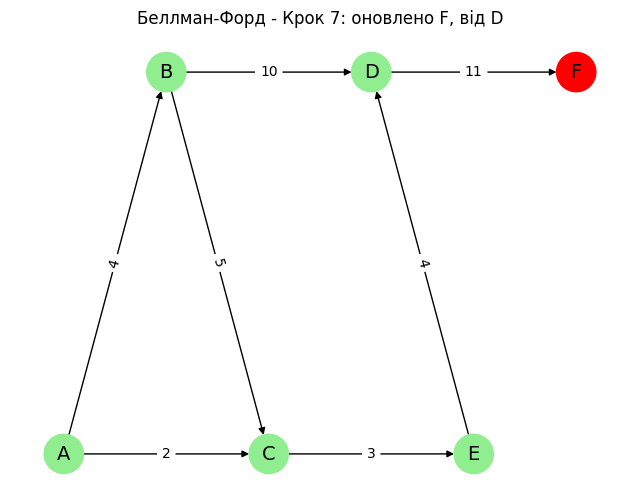

Ітерація 3
Найкоротші відстані від вершини A
A → A: 0
A → B: 4
A → C: 2
A → D: 9
A → E: 5
A → F: 20


In [29]:
def bellman_ford_visualized(graph, start):
    positions = {
    'A': (0, 0),
    'B': (2, 2),
    'C': (4, 0),
    'D': (6, 2),
    'E': (8, 0),
    'F': (10, 2)
}
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    step = 1

    edges_list = [(u, v, data['weight']) for u, v, data in graph.edges(data=True)]

    for i in range(len(graph) - 1):
        updated = False
        print(f"Ітерація {i+1}")
        for u, v, weight in edges_list:
            if distances[u] + weight < distances[v]:
                distances[v] = distances[u] + weight
                updated = True

                # Візуалізація кроку
                color_map = []
                for node in graph:
                    if node == v:
                        color_map.append('red')
                    elif distances[node] < float('inf'):
                        color_map.append('lightgreen')
                    else:
                        color_map.append('lightgray')

                plt.figure(figsize=(8,6))
                nx.draw_networkx(graph, pos=positions, with_labels=True, node_color=color_map, node_size=800, font_size=14)
                labels = nx.get_edge_attributes(graph, 'weight')
                nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=labels)
                plt.title(f"Беллман-Форд - Крок {step}: оновлено {v}, від {u}")
                plt.axis('off')
                plt.show()
                step += 1

        if not updated:
            break

    print("Найкоротші відстані від вершини", start)
    for node, dist in distances.items():
        print(f"{start} → {node}: {dist}")
    return distances

# Запуск
bellman_ford_distances = bellman_ford_visualized(G, 'A')


## Алгоритм Дейкстри

Алгоритм Дейкстри шукає найкоротший шлях у графі з невід’ємними вагами ребер.

Відстані за алгоритмом Дейкстри від вершини A:
  A: 0
  B: 4
  C: 2
  D: 9
  E: 5
  F: 20


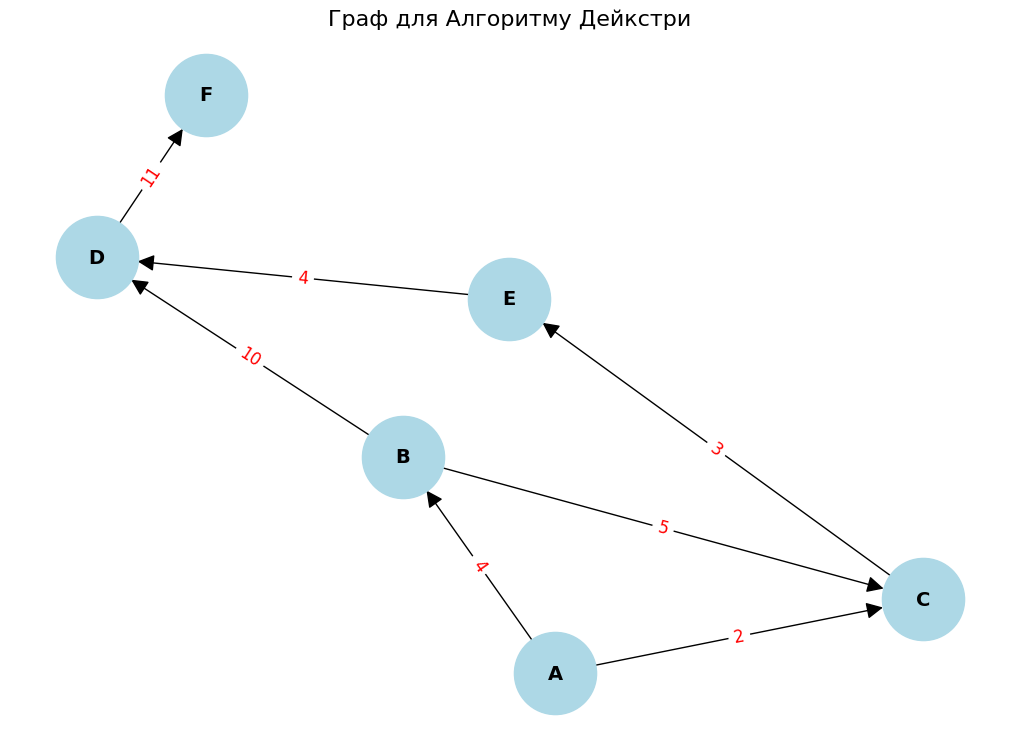

Відстані за алгоритмом Дейкстри від вершини A:
  A: 0
  B: 4
  C: 2
  D: 9
  E: 5
  F: 20


In [19]:
import heapq

def dijkstra(graph, start):
    distance = {node: math.inf for node in graph.nodes}
    distance[start] = 0
    visited = set()
    heap = [(0, start)]
    
    while heap:
        dist_u, u = heapq.heappop(heap)
        if u in visited:
            continue
        visited.add(u)
        
        for v in graph.neighbors(u):
            w = graph[u][v]['weight']
            if dist_u + w < distance[v]:
                distance[v] = dist_u + w
                heapq.heappush(heap, (distance[v], v))
    return distance

dijkstra_distances = dijkstra(G, 'A')
print("Відстані за алгоритмом Дейкстри від вершини A:")
for city, dist in dijkstra_distances.items():
    print(f"  {city}: {dist}")

draw_graph(G, "Граф для Алгоритму Дейкстри")

dijkstra_distances = dijkstra(G, 'A')
print("Відстані за алгоритмом Дейкстри від вершини A:")
for city, dist in dijkstra_distances.items():
    print(f"  {city}: {dist}")

## Візуалізація роботи алгоритму Дейкстри

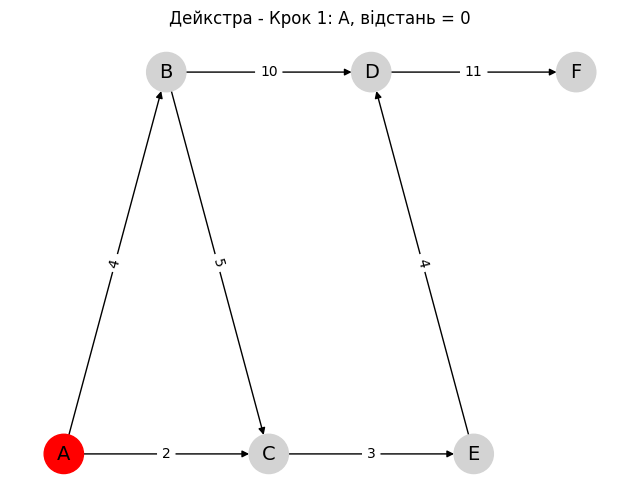

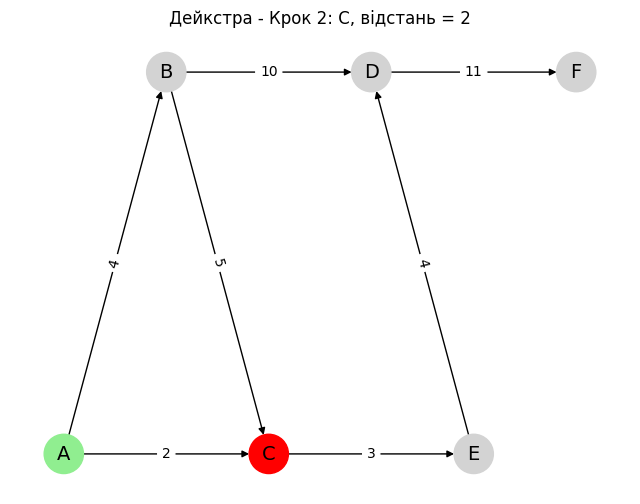

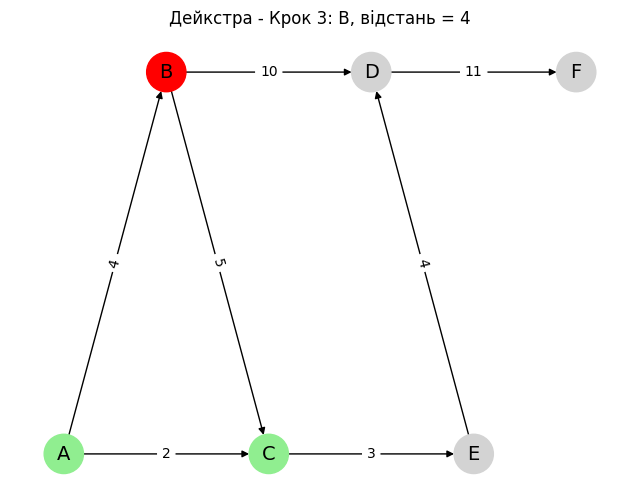

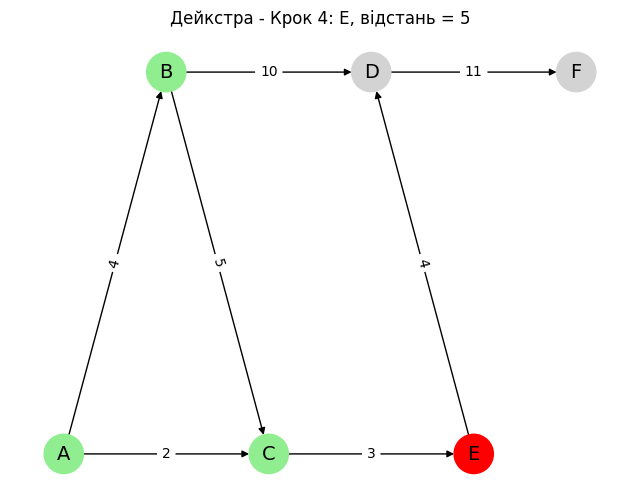

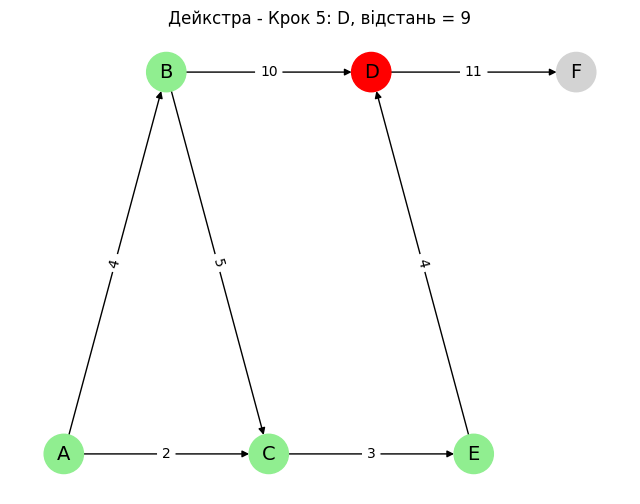

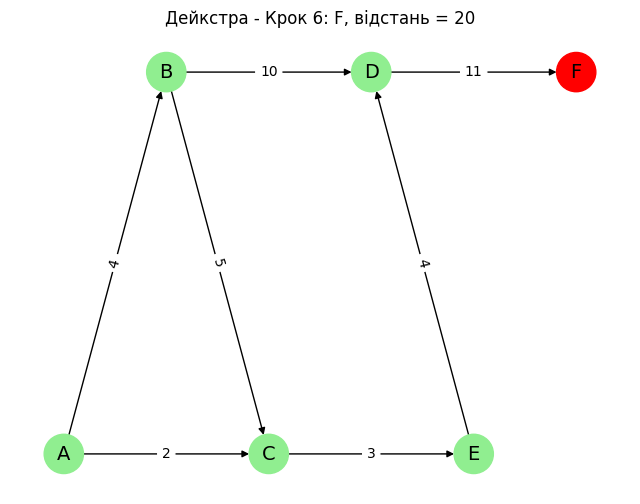

Найкоротші відстані від вершини A
A → A: 0
A → B: 4
A → C: 2
A → D: 9
A → E: 5
A → F: 20


In [27]:
import heapq

def dijkstra_visualized(graph, start):
    positions = {
    'A': (0, 0),
    'B': (2, 2),
    'C': (4, 0),
    'D': (6, 2),
    'E': (8, 0),
    'F': (10, 2)
}
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    queue = [(0, start)]
    visited = set()
    step = 1

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_node in visited:
            continue
        visited.add(current_node)

        # Візуалізація кроку
        color_map = []
        for node in graph:
            if node == current_node:
                color_map.append('red')
            elif node in visited:
                color_map.append('lightgreen')
            else:
                color_map.append('lightgray')

        plt.figure(figsize=(8,6))
        nx.draw_networkx(graph, pos=positions, with_labels=True, node_color=color_map, node_size=800, font_size=14)
        labels = nx.get_edge_attributes(graph, 'weight')
        nx.draw_networkx_edge_labels(graph, pos=positions, edge_labels=labels)
        plt.title(f"Дейкстра - Крок {step}: {current_node}, відстань = {current_distance}")
        plt.axis('off')
        plt.show()
        step += 1

        for neighbor in graph[current_node]:
            weight = graph[current_node][neighbor]['weight']
            distance = current_distance + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(queue, (distance, neighbor))

    print("Найкоротші відстані від вершини", start)
    for node, dist in distances.items():
        print(f"{start} → {node}: {dist}")
    return distances

# Запуск
dijkstra_distances = dijkstra_visualized(G, 'A')


# Відповіді на контрольні питання

1. **Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.**

Граф — це множина вершин і ребер, що з'єднують пари цих вершин. Використовується для моделювання мереж, відносин і зв’язків.

*Приклади:* соціальні мережі, транспортні системи, інтернет, електричні мережі.

---

2. **Які основні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.**

- Орієнтований граф: ребра мають напрямок (стрілки).
- Неорієнтований граф: ребра без напрямку.

---

3. **Як можна представити граф у пам’яті комп’ютера? Опишіть структури даних, які використовуються для зберігання графів.**

- Матриця суміжності.
- Список суміжності.
- Список ребер.

---

4. **Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.**

BFS обходить граф по рівнях, від найближчих вершин до віддалених.

*Приклади:* пошук найкоротшого шляху в неважених графах, перевірка зв’язності.

---

5. **Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Дайте приклади задач, де використовується DFS.**

DFS занурюється в глибину по гілках, повертаючись назад при досягненні кінця.

Відмінність: BFS — пошук по рівнях, DFS — заглиблення.

*Приклади:* топологічне сортування, пошук циклів.

---

6. **Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?**

Алгоритм шукає найкоротший шлях у графі з невід’ємними вагами ребер, поступово вибираючи найкоротшу відстань до вершини.

*Умови:* Всі ваги ребер ≥ 0.